In [1]:
#!pip install shap
!pip install sklearn
import pandas as pd
import numpy as np
import shap
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sonic\AppData\Local\Temp\pip-install-1gc2_t1t\sklearn_7fd503ba98194e2ca01e139d42b3efae\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\sonic\anaconda3\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above

In [2]:
df = pd.read_csv("../FeatureEngineering/train_complete.csv")
#df.fillna(-1,inplace=True)
#Perform PCA on only columns with no NaN values
#df = df.iloc[:,:6]
df_ids = df.iloc[:, :2]
df_gender = df.iloc[:, 3:6]
df_age = df.iloc[:,6:13]
df

,user_id,merchant_id,label,user_gender_female,user_gender_male,user_gender_unknown,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,...,user_seller_category_count,user_seller_brand_count,user_seller_Click_count,user_seller_Add_to_cart_count,user_seller_Purchase_count,user_seller_Add_to_favorite_count,user_seller_total_action,user_seller_active_days,brand_similarity_score,cat_similarity_score
0,34176,3906,0,1,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34176,121,0,1,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34176,4356,1,1,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34176,2217,0,1,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,230784,4818,0,1,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260859,359807,4325,0,0,1,0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260860,294527,3971,0,0,1,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260861,294527,152,0,0,1,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260862,294527,2537,0,0,1,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#PERFORM PCA ON LABELS AND GENDER
df_gender['label'] = df.label
df_gender

,user_gender_female,user_gender_male,user_gender_unknown,label
0,1,0,0,0
1,1,0,0,0
2,1,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
260859,0,1,0,0
260860,0,1,0,0
260861,0,1,0,0
260862,0,1,0,0


In [4]:
pca = PCA(n_components=2)
principal_components_gender = pca.fit_transform(df_gender)
#genderDF = pd.DataFrame(data = principal_components_gender, columns = ['PC1','PC2'])
#genderDF = pd.concat([genderDF, df[['label']]], axis = 1)
#genderDF

,PC1,PC2,label
0,-0.429958,-0.023374,0
1,-0.429958,-0.023374,0
2,-0.438935,-0.162606,1
3,-0.429958,-0.023374,0
4,-0.429958,-0.023374,0
...,...,...,...
260859,0.983031,-0.082032,0
260860,0.983031,-0.082032,0
260861,0.983031,-0.082032,0
260862,0.983031,-0.082032,0


In [5]:
print(pca.explained_variance_ratio_)

[0.77666887 0.11268854]


In [6]:
print(pca.singular_values_)

[324.10011806 123.4528469 ]


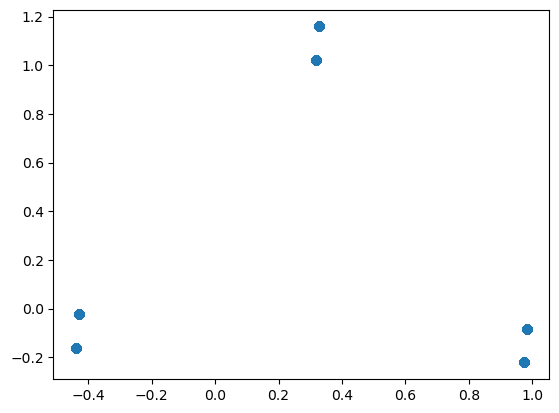

In [28]:
plt.scatter(principal_components_gender[:,0], principal_components_gender[:,1])

In [13]:
#PERFORM PCA ON LABELS AND AGE
df_age['label'] = df.label
df_age = df_age.dropna()
df_age

,user_age_0_18,user_age_18_24,user_age_25_29,user_age_30_34,user_age_35_39,user_age_40_49,user_age_50_,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
260859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
260860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
260861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
260862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
pca = PCA(n_components=2)
principal_components_age = pca.fit_transform(df_age)
ageDF = pd.DataFrame(data = principal_components_age, columns = ['PC1','PC2'])
ageDF = pd.concat([ageDF, df[['label']]], axis = 1)
ageDF = ageDF.dropna()
ageDF

,PC1,PC2,label
0,-0.154423,0.309999,0
1,-0.154423,0.309999,0
2,-0.158318,0.301777,1
3,-0.154423,0.309999,0
4,-0.099052,0.145752,0
...,...,...,...
260857,-0.610822,-0.600367,0
260858,-0.099052,0.145752,0
260859,-0.099052,0.145752,0
260860,-0.099052,0.145752,0


In [19]:
print(pca.explained_variance_ratio_)

[0.33401989 0.22529419]


In [20]:
print(pca.singular_values_)

[246.68245212 202.59423659]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

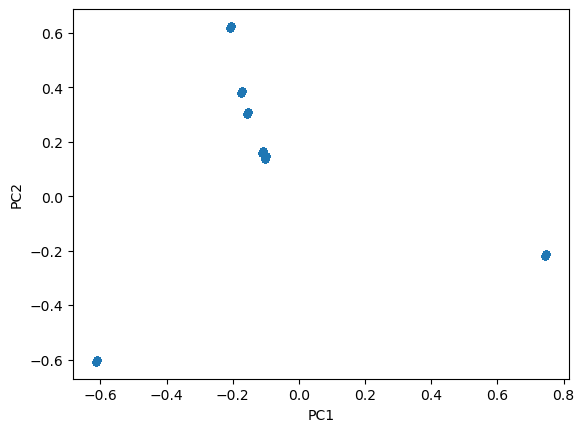

In [21]:
ageDF.plot(x='PC1', y='PC2', kind='scatter')

In [37]:
pca = PCA(n_components=2)
df.fillna(-1,inplace=True)
PC = pca.fit_transform(df)

In [38]:
print(pca.explained_variance_ratio_)

[9.99859254e-01 1.40555874e-04]


In [39]:
print(pca.singular_values_)

[62515231.47194771   741209.3819955 ]


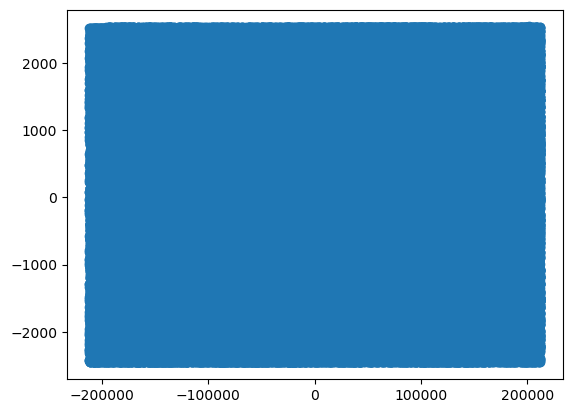

In [41]:
plt.scatter(PC[:,0], PC[:,1])